In [1]:
import numpy as np
import yaml, os
from sys import path
from pathlib import Path
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const

path.append("opereira/starships/cc_scripts/")

import cc_scripts.reduction as red
import cc_scripts.make_model as mod
import cc_scripts.correlations as corr

from starships.correlation import quick_correl
from starships.correlation_class import Correlations

from importlib import reload
# red = reload(red)

# unpack input parameters into config dictionary
config_filepath = 'config.yaml'
with open(config_filepath, 'r') as file:
    config_dict = yaml.safe_load(file)

config_dict['obs_dir'] = Path.home() / Path(config_dict['obs_dir'])

# creating the planet and observation objects
planet, obs = red.load_planet(config_dict)

# # Choose which exposures to use
# all_exposures = np.arange(obs.n_spec)
# transit_tags = np.delete(all_exposures, [20, 21, 22, 23, 31, 32, 33])  # Here we exclude the exposures [20, 21, ..., 33]

INFO:starships.planet_obs:Getting WASP-127 b from ExoFile
INFO:starships.planet_obs:Fetching the uncorrected spectra
INFO:starships.planet_obs:File: list_e2ds


Changing M_star from [2.14748266e+30] kg to 1.8889893771631484e+30 kg
It became [1.88898938e+30] kg
Changing R_star from [9.67023e+08] m to 927368100.0 m
It became [9.273681e+08] m
Changing M_pl from [3.12621121e+26] kg to 3.131905585604484e+26 kg
It became [3.13190559e+26] kg
Changing R_pl from [93726012.] m to 93726012.0 m
It became [93726012.] m
Changing RV_sys from [0.] km / s to -8.86 km / s
It became [-8.86] km / s
Changing mid_tr from [2458385.175527] d to 2459575.9239004 d
It became [2459575.9239004] d
Changing t_peri from [2458385.175527] d to 2459575.9239004 d
It became [2459575.9239004] d
Changing trandur from [15670.368] s to 4.3529 h
It became [15670.44] s
Changing period from [360984.827232] s to 4.1780625 d
It became [360984.6] s
Changing excent from 0.0 to 0.0
It became 0.0
Changing incl from [1.5393804] rad to 87.84 deg
It became [1.53309721] rad
Changing Teff from [5620.] K to 5842
It became [5842.] K
Changing Tp from [1400.] K to 1400.0 K
It became [1400.] K
Changing

INFO:starships.planet_obs:Fetching data
INFO:starships.planet_obs:File: list_tellu_corrected
INFO:starships.planet_obs:Fetching the tellurics
INFO:starships.planet_obs:File: list_tellu_recon


Transmission
Masking high variance pixels (quick fix for OH lines). 
flux_norm all nan : False
Shifting everything in the stellar ref. frame and normalizing by the median 
Spectra 
 Unberv : 74 - 55  
Telluriques 
 Unberv : 74 - 55  
flux_Sref all nan : False
Masking deep tellurics. 
flux_masked all nan : False
Building the master out #1 
ratio_filt has values <= 0.75!
flux_norm_mo all nan : False
master_out all nan : False
Building the transmission spectrum #1 
spec-trans all nan : False
Removing the static noise with PCA and sigma cliping 
(56, 75, 4088)
spec_trans all nan : False
clean_ts all nan : False
Removing the mean 
Removing the remaining high variance pixels. 

Removing the mean. 
Calculating noise with 5 PCs
/scratch/opereira/DataAnalysis/NIRPS-APERO/Reductions/WASP-127b_TEST/retrieval_input_5-pc_mask_wings90_mask_tellu20_data_info.npz
/scratch/opereira/DataAnalysis/NIRPS-APERO/Reductions/WASP-127b_TEST/retrieval_input_5-pc_mask_wings90_mask_tellu20_data_trs_0.npz


/home/opereira/.venvs/starships-env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 5 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'nonmarkingreturn', 'phi1', 'space']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 873]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 5 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'nonmarkingretur

TypeError: plot_steps() got an unexpected keyword argument 'path'

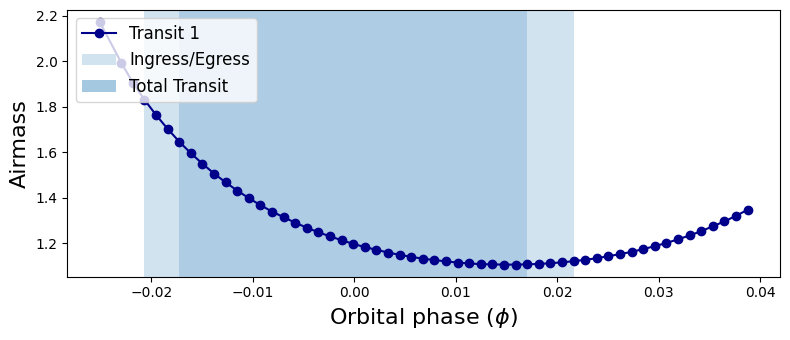

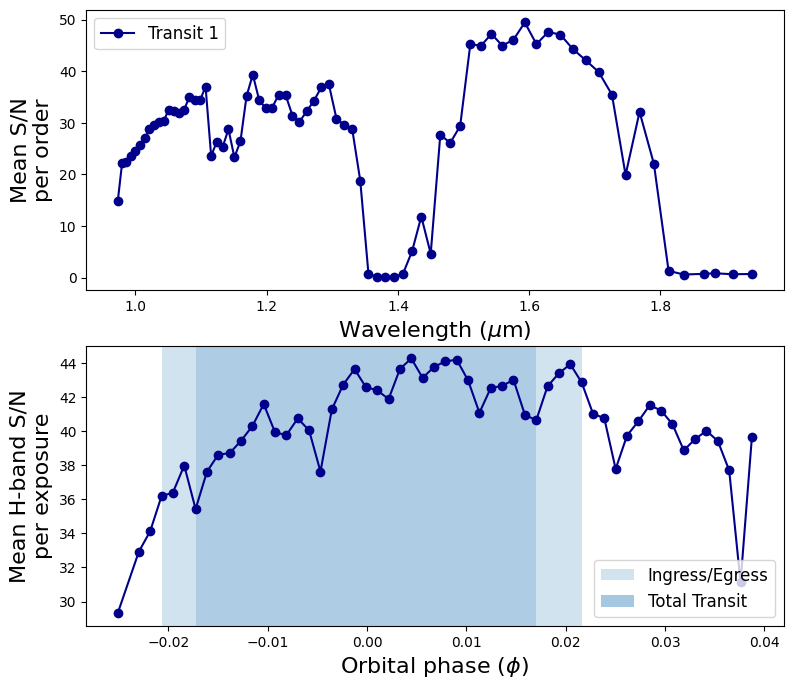

In [2]:
'''---------------------------------------Reducing the Data--------------------------------------'''

out_dir, path_fig = red.set_save_location(planet.name, config_dict['reduction'], config_dict['instrument']) # might replace with out_dir from YAML file

# building the transit spectrum
list_tr = red.build_trans_spec(config_dict, config_dict['n_pc'], config_dict['mask_tellu'], config_dict['mask_wings'], obs, planet)

# saving the transit spectrum
red.save_pl_sig(config_dict['n_pc'], config_dict['mask_tellu'], config_dict['mask_wings'], list_tr, out_dir, do_tr = [1])

# outputting plots for reduction step
red.reduction_plots(list_tr, config_dict['n_pc'], config_dict['mask_tellu'], config_dict['mask_wings'], config_dict['idx_ord'], path_fig)

INFO:cc_scripts.make_model:Model not initialized for mode = high. Starting initialization...
INFO:starships.petitradtrans_utils:['H2O_main_iso']
/home/opereira/.venvs/starships-env/lib/python3.11/site-packages/petitRADTRANS/radtrans.py:100: FutureWarning: pRT_input_data_path was set by an environment variable. In a future update, the path to the petitRADTRANS input_data will be set within a .ini file that will be automatically generated into the user home directory (OS agnostic), inside a .petitradtrans directory
  warnings.warn(f"pRT_input_data_path was set by an environment variable. In a future update, the path to "


  Read line opacities of H2O_main_iso...
 Done.

  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...


INFO:starships.petitradtrans_utils:Generating atmosphere with pressures from 100.0 to 1e-10
INFO:starships.petitradtrans_utils:You are not getting the individual contributions of the species
INFO:cc_scripts.make_model:Saving values in `linelist_names`.


Done.



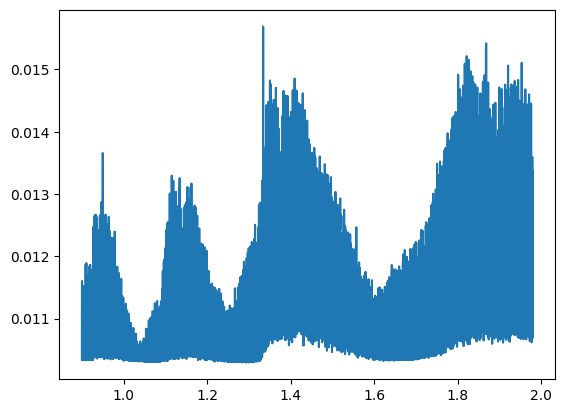

In [13]:
'''-------------------------------------Generating the Model-------------------------------------'''
# line_opacities = 'H2O_main_iso'
reload(mod)

config_filepath = 'model_config.yaml'
with open(config_filepath, 'r') as file:
    config_model = yaml.safe_load(file)

# computing extra parameters needed for model making
int_dict = mod.create_internal_dict(config_model, planet)

# create the model
wave_mod, mod_spec = mod.prepare_model_high_or_low(config_model, int_dict, planet)

plt.plot(wave_mod, mod_spec)

Highest SNR = 4.808426770802308 // Kp = [108] // RV = -6.20423789273075 
Max SNR = 4.50$\sigma$, Max position = -4.83



INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 7 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'K', 'nonmarkingreturn', 'phi1', 'space', 'v']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 46, 89, 873]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 7 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'K', 'nonmarkingreturn', 'phi1', 'space', 'v']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 46, 89, 873]
INFO:fontTools.subset:Closing glyph list over 'glyf': 7 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'K', 'nonmarkingreturn', 'phi1', 's

Saved file to :  /scratch/opereira/DataAnalysis/NIRPS-APERO/Reductions/WASP-127b_TEST/FiguresCCF_classic_ccf.pdf


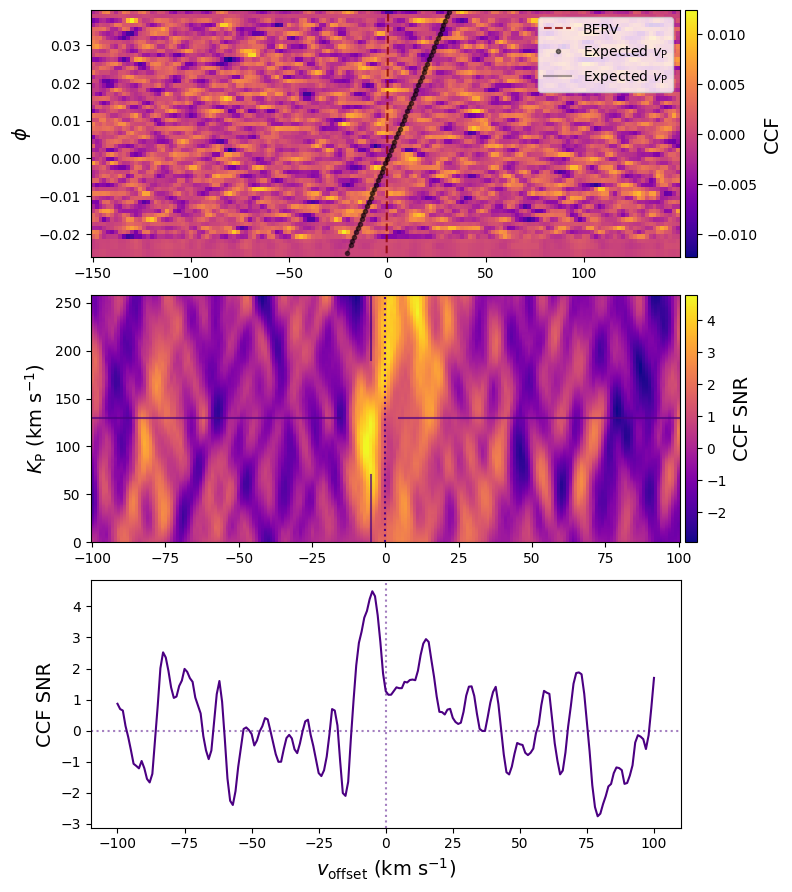

In [14]:
'''---------------------------------Correlations---------------------------------'''

corr = reload(corr)

# # 1. standard CCF
corrRV = np.arange(config_dict['RV_range'][0], config_dict['RV_range'][1], 2)

corr.classic_ccf(config_dict, list_tr['1'], wave_mod, mod_spec, str(path_fig), corrRV)
# # Do the correlation
# ccf = quick_correl(list_tr['1'].wave, list_tr['1'].final, corrRV, wave_mod, mod_spec, wave_ref=None, 
#                      get_logl=False, kind='BL', mod2d=False, expand_mask=0, noise=None, somme=False)

In [14]:
# 2. quick correlation

corrRV = np.arange(config_dict['RV_range'][0], config_dict['RV_range'][1], config_dict['RV_step'])

n_pcas = [1,2,3,4, 5, 6, 7, 8]
Kp_array = np.array([ list_tr['1'].Kp.value ])  # np.arange(kp0, int(Kp.value*2))

In [ ]:
import starships.correlation as correl

loblBL_t1_corr, \
loblBL_t1_sig = correl.quick_calc_logl_injred_class(list_tr['1'], Kp_array, corrRV, n_pcas, 
                                                    wave_mod, np.array(mod_spec), nolog=True, 
                                                    inj_alpha='ones', RVconst=list_tr['1'].RV_const)

ccf_map, logl_map = correl.calc_logl_injred(
    obs,'seq', planet, Kp_array, corrRV, n_pcas, wave_mod, mod_spec,  config_dict['kind_trans'])

Injecting model w/ alpha = ones
 Previous N_pc = 4, changing to 1  
Building final transmission spectrum with 1 n_pc
flux_norm all nan : False
flux_Sref all nan : False
flux_masked all nan : False
flux_norm_mo all nan : False
master_out all nan : False
Removing the static noise with PCA and sigma cliping 
(56, 75, 4088)
spec_trans all nan : False
clean_ts all nan : False
Removing the mean 
Removing the remaining high variance pixels. 

Removing the mean. 
 Previous N_pc = 1, changing to 2  84, File = 1/1, RV = 300/300  
Building final transmission spectrum with 2 n_pc
flux_norm all nan : False
flux_Sref all nan : False
flux_masked all nan : False
flux_norm_mo all nan : False
master_out all nan : False
Removing the static noise with PCA and sigma cliping 
(56, 75, 4088)
spec_trans all nan : False
clean_ts all nan : False
Removing the mean 
Removing the remaining high variance pixels. 

Removing the mean. 
 Previous N_pc = 2, changing to 3  84, File = 1/1, RV = 300/300  
Building final t

Max value at 4 npc = 4.326800822597019 at -7.9999948521443836 km/s
Max value at 4 npc = 4.954948136094901 at -7.9999948521443836 km/s
Max value at 4 npc = 4.954948136094901 at -7.9999948521443836 km/s
[4.22151479 4.25970318 4.24529343 4.32680082]
[-171714.35802349 -193492.76211339 -223261.97409465 -212685.53269218]
[223.27600481 225.27558045 218.57219627 219.62563272]
[      0.          -43556.80817981 -103095.23214232  -81942.34933739]
(56, 150, 4)
(array([52, 53]),)
In-transit t-val = 5.85 / p-val 1.08e-07 / sig = 5.18
Out-of-transit t-val = -0.22 / p-val 8.25e-01 / sig = -0.93
Max value at 3 npc = 4.304028565028397 at -7.9999948521443836 km/s
Max value at 3 npc = 4.979003983715107 at -7.9999948521443836 km/s
Max value at 3 npc = 4.979003983715107 at -7.9999948521443836 km/s
[4.19575774 4.2594096  4.30402857 4.21934303]
[-162987.87328893 -181748.97130097 -199338.29934776 -211144.91619113]
[218.6715388  220.92410297 219.12347705 212.18337754]
[     0.         -37522.19602409 -72700.85

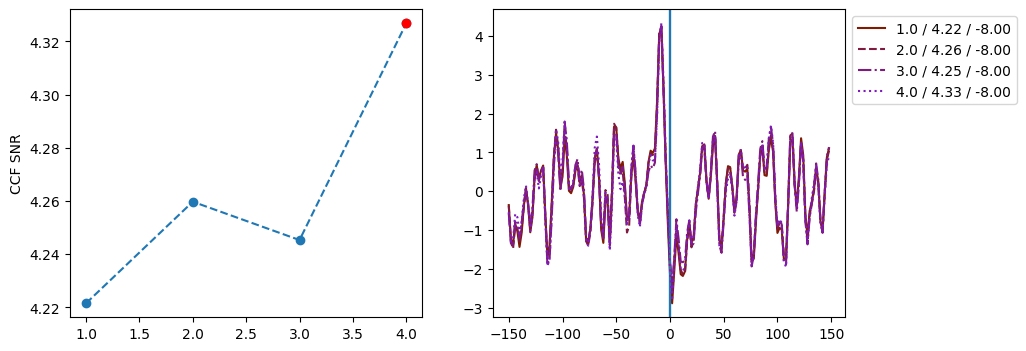

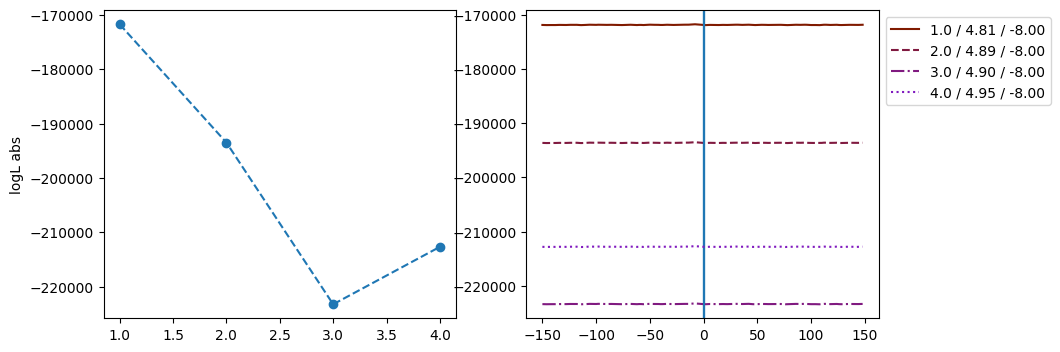

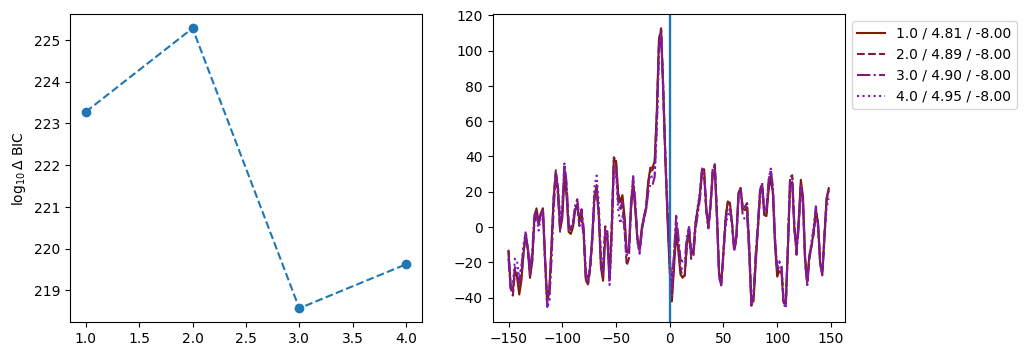

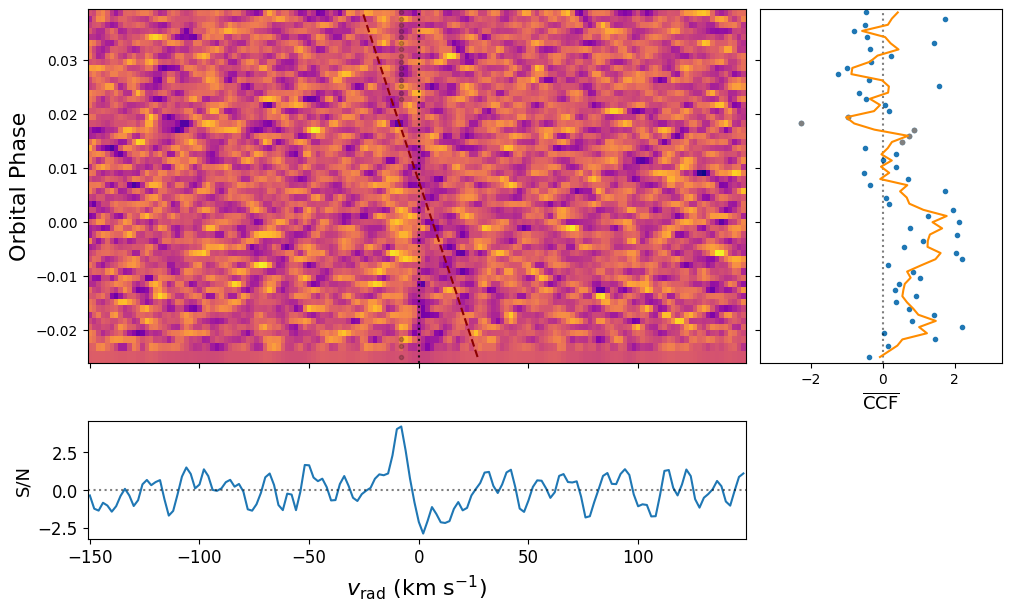

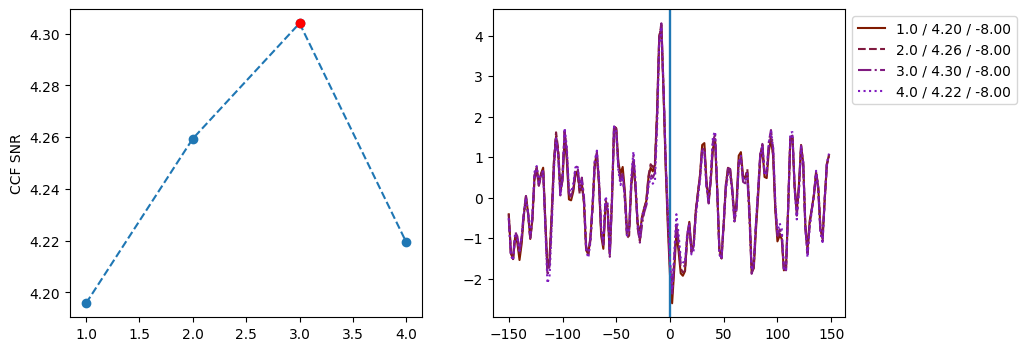

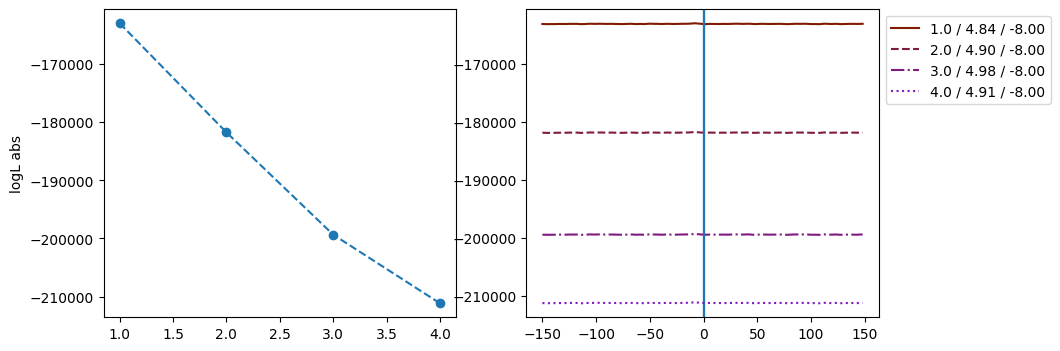

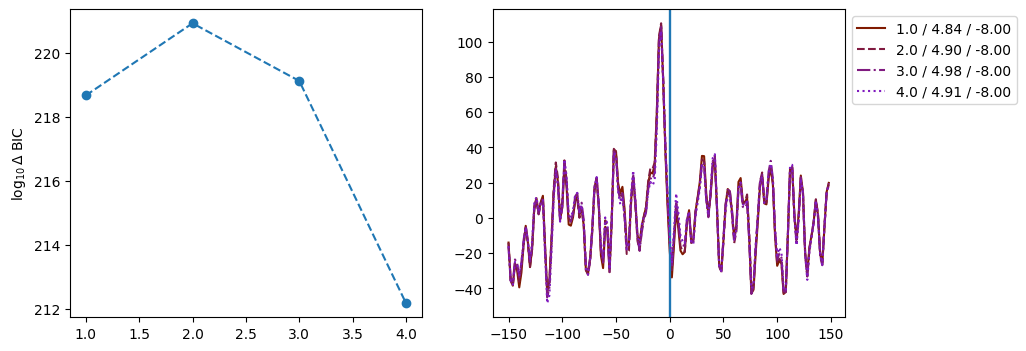

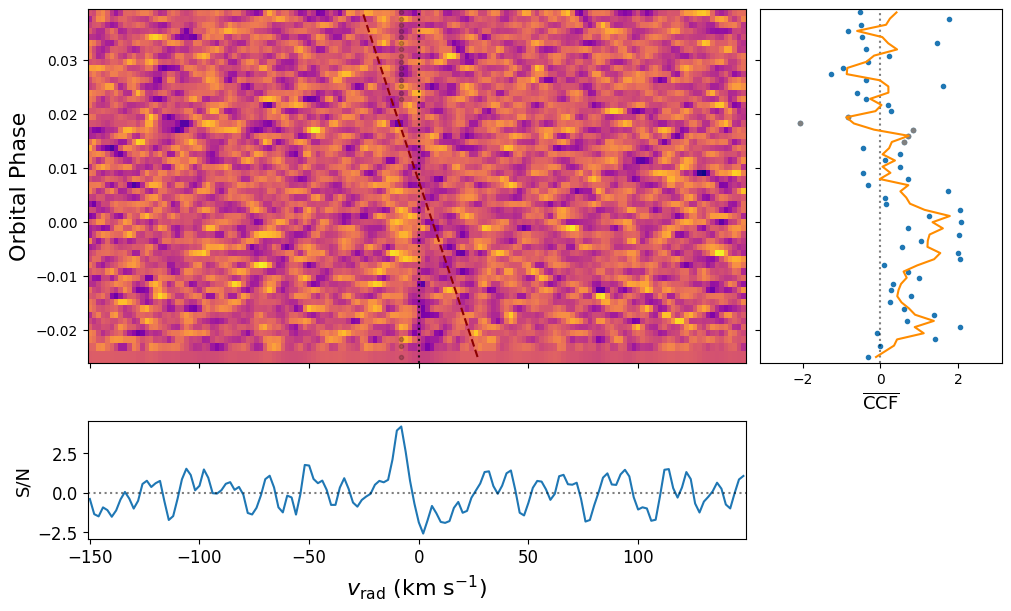

In [9]:
orders = np.arange(75)
id_pc0=0
import starships.correlation_class as cc

ccf_obj, logl_obj = cc.plot_ccflogl(obs, ccf_map, logl_map, corrRV,
                                    Kp_array, n_pcas, id_pc0=id_pc0, orders=orders)

lobl_obj, lobl_obj = cc.plot_ccflogl(obs, loblBL_t1_corr, loblBL_t1_sig, corrRV,
                                    Kp_array, n_pcas, id_pc0=id_pc0, orders=orders)

Max value at 3 npc = nan at 0.0 km/s
Max value at 3 npc = nan at 0.0 km/s
Max value at 3 npc = nan at 0.0 km/s
[nan nan]
[-247541.4569671 -255123.2159882]
[-15.36078112 -12.73480391]
[     0.         -15163.51804221]


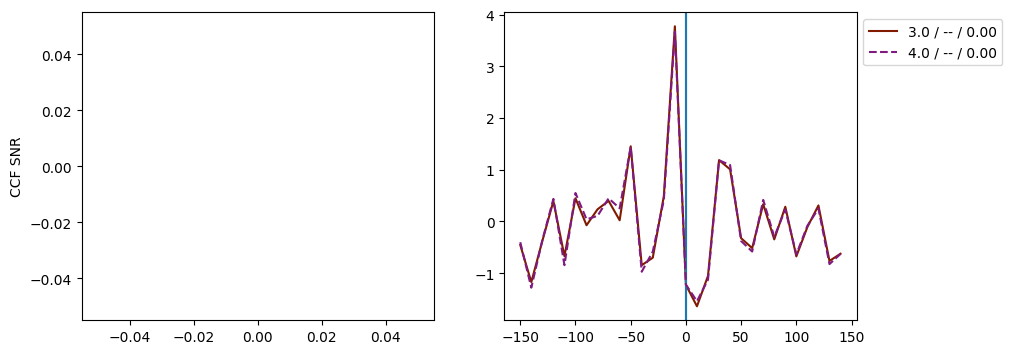

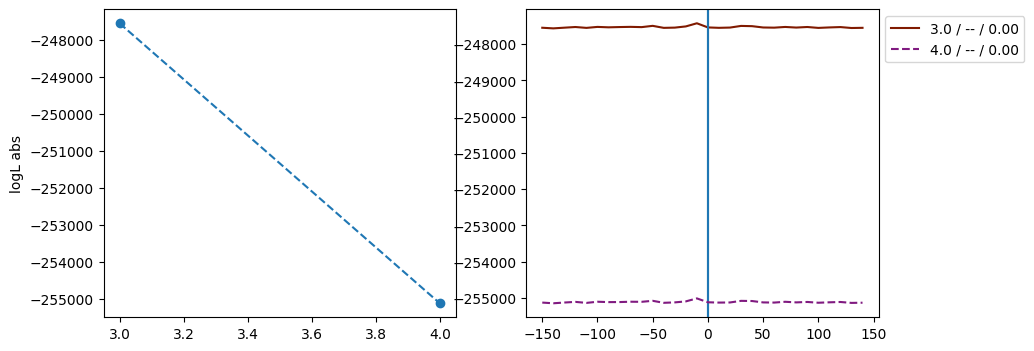

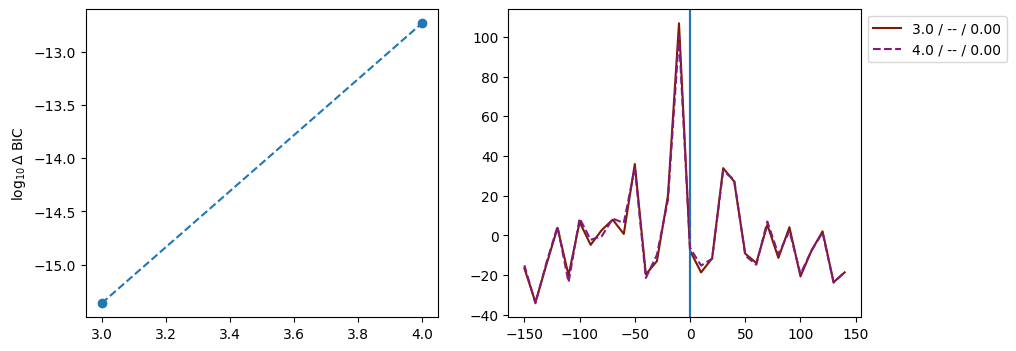

In [9]:
# plot the 1D CCF for all n_pcas

index12 = 10

# remove orders if necessary
# or to check the contribution of specific bands only
orders = np.arange(75) #list(nf.remove_values_from_array(bands(t1.wv,'yjhk'), []+nf.ord_frac_tresh(t1, 0.0)))

loglBL_grid_t123 = loblBL_t1_corr
loglBL_grid_t123_sig = loblBL_t1_sig
t=list_tr['1']

log12_single0 = Correlations(loglBL_grid_t123, kind="logl", rv_grid=corrRV, n_pcas=n_pcas, kp_array=np.array([0]))
log12_single0.calc_logl(t, orders=orders, index=index12, N=None, nolog=False, icorr=t.iIn)
# if the peak has an offset from 0, can give an approximate value to RV_sys to look for a peak elsewhere
# (I think)
log12_single0.plot_multi_npca(RV_sys=0.0, title='CCF SNR')

log12s_single0 = Correlations(loglBL_grid_t123_sig, kind="logl", rv_grid=corrRV, 
                              n_pcas=n_pcas, kp_array=np.array([0]))
log12s_single0.calc_logl(t, orders=orders, index=index12, N=t.N, nolog=True,  icorr=t.iIn)
# log12s_single0.plot_multi_npca(RV_sys=t1.RV_sys, title='logL SNR')

log12s_single0.plot_multi_npca(RV_sys=planet.RV_sys.value, kind='courbe', kind_courbe='abs', title='logL abs')
log12s_single0.plot_multi_npca(RV_sys=planet.RV_sys.value, kind='courbe', kind_courbe='bic', 
                              title=r'$\log_{10} \Delta$ BIC')

print(log12_single0.npc_val)
print(log12s_single0.npc_max_abs)
print(log12s_single0.npc_bic)
print(2*(log12s_single0.npc_max_abs-log12s_single0.npc_max_abs[0]))

(56, 30, 2)


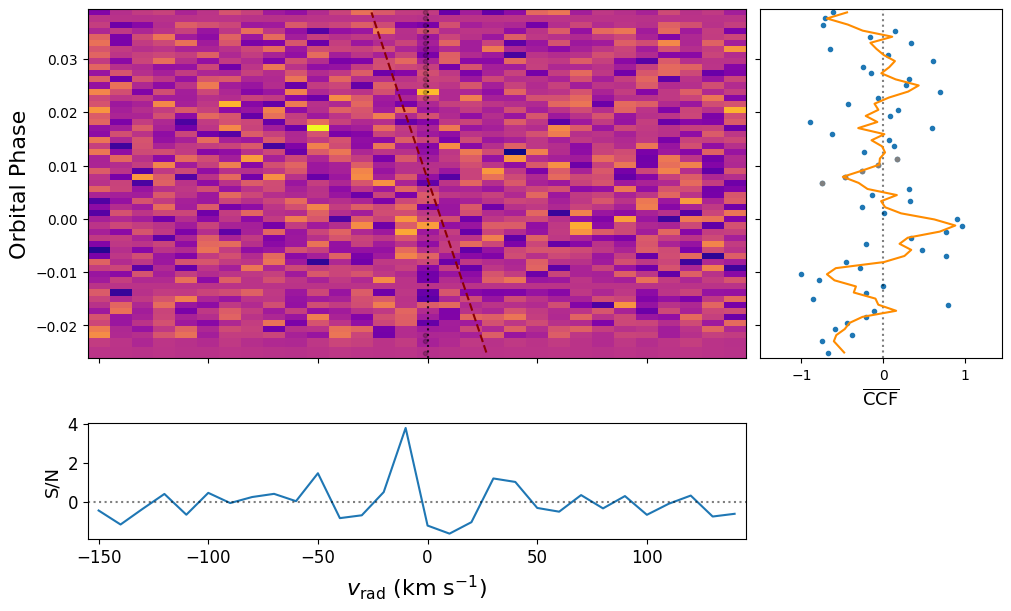

In [10]:
# plot the CCF per exposure for a specific number of PCs removed
# give the array indexing of the n_pc to check
id_pc=0
t=list_tr['1']

# specify a path and name if you want to save this plot
# path_fig = '/Users/fredericg/doctorat/saved_correl/figures/'
path_fig=None
# fig_name = 'WASP-127b_nPC_4_tellu_30'
fig_name = None

# log12_single0.pos=0.0
log12_single0.plot_PRF( t, RV=-1., icorr=None, 
#                       split_fig=[0, t1.n_spec, t1.n_spec+t2.n_spec],
                     kind='logl_corr', index=index12, remove_mean=True,# [62,63],
#                         hlines=[[2,t1.phase[t1.iIn[0]], ':', 'w'], 
#                                 [1,t2.phase[t2.iIn[0]], ':','w'], ],
#                      texts=[[2, corrRV0[4], t1.phase[-9],'Tr1'],[1, corrRV0[4], t2.phase[-6],'Tr2']], 
                      path_fig=path_fig, fig_name=fig_name, 
                       extension='.pdf', map_kind='snr', id_pc=id_pc,
                      figwidth=9)

# log12_single0.ttest_value(t, kind='logl', vrp=np.zeros_like(t.vrp).value, 
#                              plot=False, speed_limit=3, peak_center=30, equal_var=False)

Injecting model w/ alpha = ones
Starting with 4 PCs
Computing with
 Previous N_pc = 4, changing to 3  
Building final transmission spectrum with 3 n_pc
flux_norm all nan : False
flux_Sref all nan : False
flux_masked all nan : False
flux_norm_mo all nan : False
master_out all nan : False
Removing the static noise with PCA and sigma cliping 
(56, 75, 4088)
spec_trans all nan : False
clean_ts all nan : False
Removing the mean 
Removing the remaining high variance pixels. 

Removing the mean. 
Computing with = 3, Kp = 1/1 = 129.84, File = 1/1, RV = 30/30  
 Previous N_pc = 3, changing to 4  
Building final transmission spectrum with 4 n_pc
flux_norm all nan : False
flux_Sref all nan : False
flux_masked all nan : False
flux_norm_mo all nan : False
master_out all nan : False
Removing the static noise with PCA and sigma cliping 
(56, 75, 4088)
spec_trans all nan : False
clean_ts all nan : False
Removing the mean 
Removing the remaining high variance pixels. 

Removing the mean. 


/home/opereira/starships/starships/correlation_class.py:214: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label='{:.1f} / {:.2f} / {:.2f}'.format(self.n_pcas[i], self.max, self.pos))
/home/opereira/starships/starships/correlation_class.py:223: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label='{:.1f} / {:.2f} / {:.2f}'.format(self.n_pcas[i], self.max, self.pos))
/home/opereira/starships/starships/correlation_class.py:219: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  label='{:.1f} / {:.2f} / {:.2f}'.format(self.n_pcas[i], self.max, self.pos))


Max value at 3 npc = nan at 0.0 km/s
Max value at 3 npc = nan at 0.0 km/s
Max value at 3 npc = nan at 0.0 km/s
[nan nan]
[-372804.27269141 -377257.58459125]
[-31.85254284 -37.25698796]
[    0.         -8906.62379969]
(56, 30, 2)
(array([51, 52, 53]),)
In-transit t-val = -5.95 / p-val 2.72e-08 / sig = 5.44
Out-of-transit t-val = 1.93 / p-val 5.87e-02 / sig = 1.57


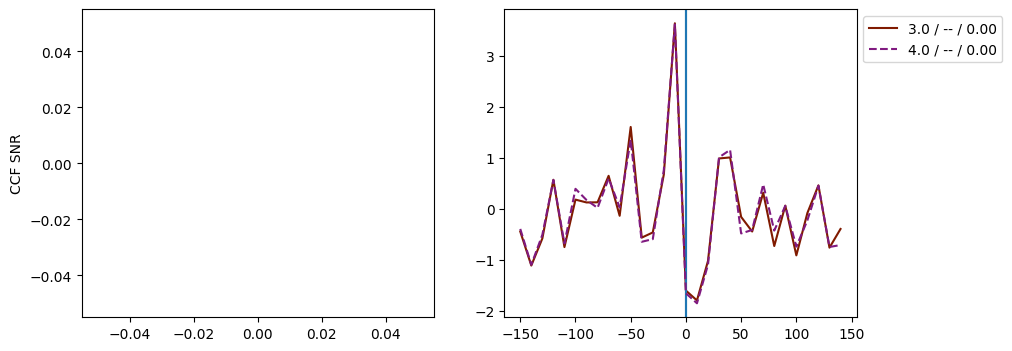

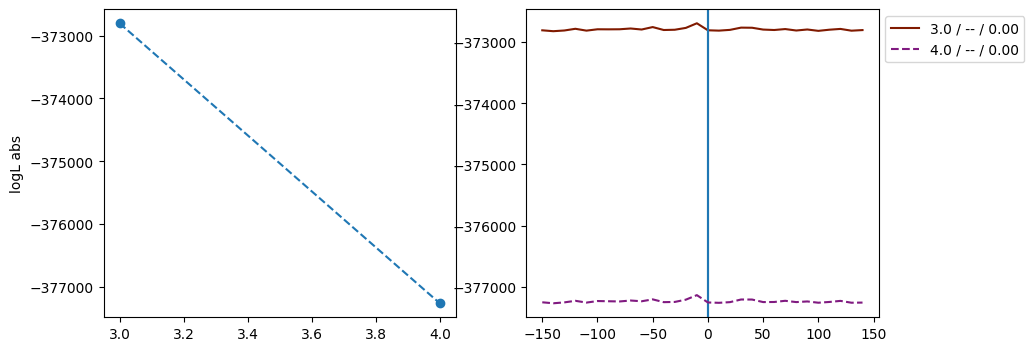

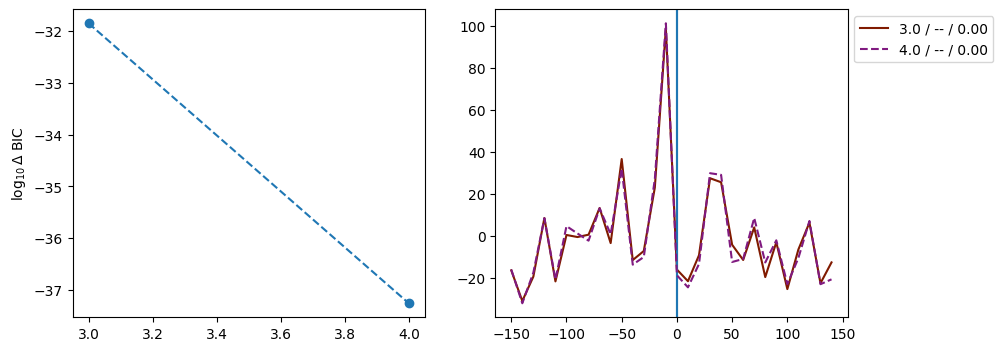

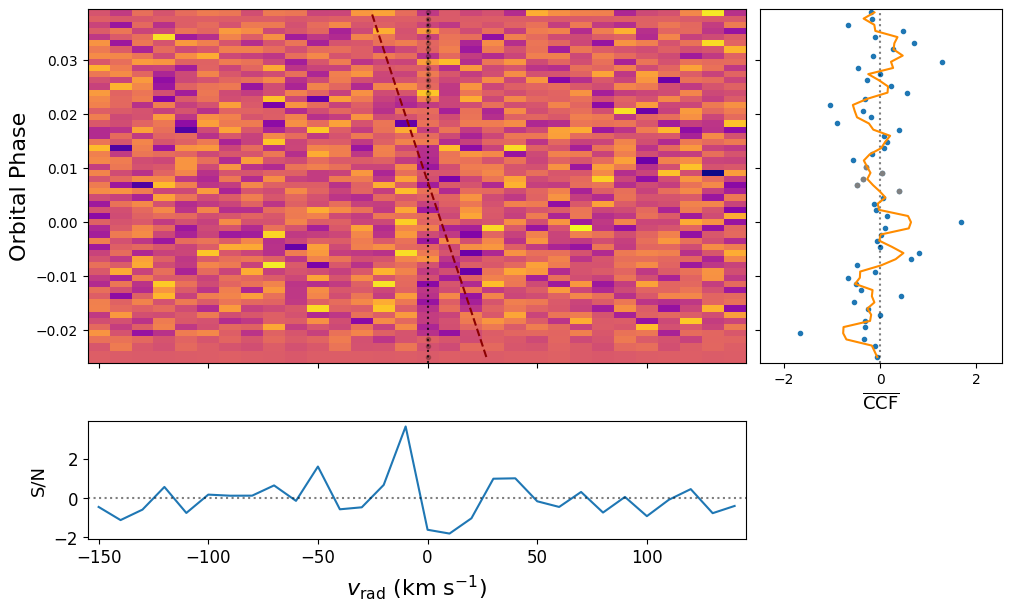

In [37]:
# Antoine's Correlations.ipynb

n_pc_list = [3,4]
mask_wings_list = []
all_obs = dict()
all_ccf_map = dict()
all_logl_map = dict()
# for filename in filename_list:
# obs = pl_obs.load_single_sequences(filename, pl_name, path=reduc_dir,
#                           load_all=False, filename_end='', plot=False, planet=planet_obj)

# Generate Kp 
Kp_array = np.array([obs.Kp.value]) 

# n_pc = int(obs.params[5])
# n_pc_list.append(n_pc)

# mask_wings = int(obs.params[1] * 100)  # in percent
mask_wings_list.append(config_dict['mask_wings'])

out_filename = 'TEST' #f'{Path(filename).stem}_ccf_logl_seq_{model_name}'

# try:
#     # Check if already generated
#     saved_values = np.load(out_dir / Path(out_filename).with_suffix('.npz'))
#     ccf_map = saved_values['corr']
#     logl_map = saved_values['logl']
# except FileNotFoundError:
# Generate 1d correlations
# ccf_map shape: (n_exposures, n_order, n_Kp, n_vsys, n_pc, n_model) 
ccf_map, logl_map = correl.calc_logl_injred(
    obs,'seq', planet, Kp_array, corrRV, n_pcas, wave_mod, mod_spec,  config_dict['kind_trans'])


# corr.save_logl_seq(out_dir / Path(out_filename), ccf_map, logl_map,
#                    wave_mod, model_spec, n_pc, Kp_array, corrRV0, kind_trans)


# all_obs[(n_pc, mask_wings)] = obs
# all_ccf_map[(n_pc, mask_wings)] = ccf_map
# all_logl_map[(n_pc, mask_wings)] = logl_map
    
# out_filename = f'v{apero_version}_wasp33_{n_pc}-pc_mask_wings{mask_wings*100:n}'
order_indices = np.arange(75)  #np.array([46])
id_pc0 = 0

# Plot all ccf and logl as a function of pc
# for mask_wings in mask_wings_list:
#     ccf_maps_in = [all_ccf_map[(n_pc, mask_wings)] for n_pc in n_pc_list]
#     ccf_maps_in = np.concatenate(ccf_maps_in, axis=-2)
#     logl_maps_in = [all_logl_map[(n_pc, mask_wings)] for n_pc in n_pc_list]
#     logl_maps_in = np.concatenate(logl_maps_in, axis=-2)
#     obs = all_obs[(n_pc_list[0], mask_wings)]
#     print('mask_wings: ', mask_wings)
ccf_obj, logl_obj = cc.plot_ccflogl(obs, ccf_map, logl_map, corrRV,
                                    Kp_array, n_pcas, id_pc0=id_pc0, orders=order_indices)

In [ ]:
# ttest maps

ccf_obj.ttest_map(all_obs[(n_pc, mask_wings)], kind='logl', vrp=np.zeros_like(obs.vrp), orders=order_indices, 
                  kp0=0, RV_limit=75, kp_step=5, rv_step=2, RV=None, speed_limit=3, icorr=obs.iIn, equal_var=False
                  )